## Cleaning our data

In [169]:
import pandas as pd
import numpy as np
import os
import regex as re
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
df = pd.read_csv('Testing.csv', engine='python')
df.count()

itching                 41
skin_rash               41
nodal_skin_eruptions    41
continuous_sneezing     41
shivering               41
                        ..
inflammatory_nails      41
blister                 41
red_sore_around_nose    41
yellow_crust_ooze       41
prognosis               41
Length: 133, dtype: int64

In [173]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [175]:
df = df.fillna(0)

In [177]:
fill = df['prognosis'].iloc[0]
for i in range(1, len(df)):  # Change 1867 to len(df)
    if df['prognosis'].iloc[i] == 0:
        df['prognosis'].iloc[i] = fill
    else:
        fill = df['prognosis'].iloc[i]
df['prognosis']

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [179]:
df = df[df.prognosis != 0]
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [181]:
df['prognosis'] = df['prognosis'].apply(lambda x: x.split('^'))
df['prognosis']

0                            [Fungal infection]
1                                     [Allergy]
2                                        [GERD]
3                         [Chronic cholestasis]
4                               [Drug Reaction]
5                         [Peptic ulcer diseae]
6                                        [AIDS]
7                                   [Diabetes ]
8                             [Gastroenteritis]
9                            [Bronchial Asthma]
10                              [Hypertension ]
11                                   [Migraine]
12                       [Cervical spondylosis]
13               [Paralysis (brain hemorrhage)]
14                                   [Jaundice]
15                                    [Malaria]
16                                [Chicken pox]
17                                     [Dengue]
18                                    [Typhoid]
19                                [hepatitis A]
20                                [Hepat

In [183]:
df = df.explode('prognosis').reset_index()

In [185]:
df['prognosis'] = df['prognosis'].apply(lambda x: x.split('_')[1] if '_' in x else x)


**Cleaned dataset**

In [188]:
# Split on '^', explode, and reset index
df['prognosis'] = df['prognosis'].apply(lambda x: x.split('^'))
df = df.explode('prognosis').reset_index(drop=True)

# Safely split on '_' and handle missing/invalid values
df['prognosis'] = df['prognosis'].apply(
    lambda x: x.split('_')[1] if isinstance(x, str) and '_' in x else x
)

df

,index,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,2,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,4,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


**One Hot Encoding**

In [191]:
df_sparse = pd.get_dummies(df, columns=['prognosis'], drop_first=False)
df_sparse = df_sparse.drop_duplicates()
df_sparse.head()


,index,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,0,1,1,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2,0,0,0,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
3,3,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,1,1,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


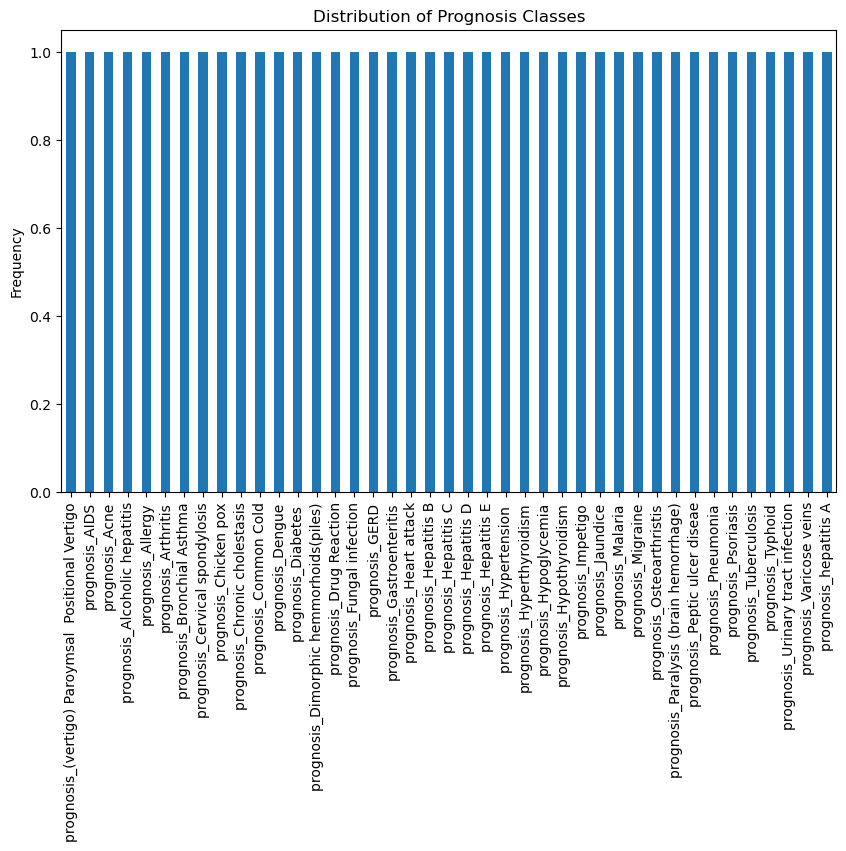

In [193]:
import matplotlib.pyplot as plt

prognosis_columns = [col for col in df_sparse.columns if col.startswith('prognosis_')]
df_sparse[prognosis_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Prognosis Classes')
plt.ylabel('Frequency')
plt.show()

In [194]:
X = df_sparse[df_sparse.columns[1:]]
Y = df['prognosis']

Writing our cleaned data

### Trying out our classifier to learn diseases from the symptoms

In [199]:
from sklearn.model_selection import train_test_split

In [201]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Training a Classifier

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_clf = GradientBoostingClassifier()
xgb_clf.fit(X, Y)
score = xgb_clf.score(X, Y)
print(score)

1.0


In [207]:
print ("DecisionTree")
clf = DecisionTreeClassifier()
model = clf.fit(X,Y)
print ("Acurracy: ", model.score(X,Y))

DecisionTree
Acurracy:  1.0


In [208]:
model.predict(x_test)

array(['Tuberculosis', 'Arthritis', 'Heart attack', 'Drug Reaction',
       'Hypertension ', 'Hypothyroidism', 'Pneumonia', 'Migraine',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [209]:
model.score(x_test, y_test)

1.0

## 3.3 Training our model for custom symptoms data

In [211]:
input_data = pd.read_csv('Testing.csv')
input_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [212]:
test_data = pd.read_csv('Testing.csv')
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [213]:
#They are 4920 rows, 133 columns
input_data.shape

(41, 133)

**Check for any Null values**

In [222]:
#seeing any null values are there with descending format
input_data.isnull().sum().sort_values(ascending=False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

**See the Target Variable Distribution**

In [225]:
#looking how much percent each diseases having
input_data['prognosis'].value_counts(normalize = True)

prognosis
Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D          

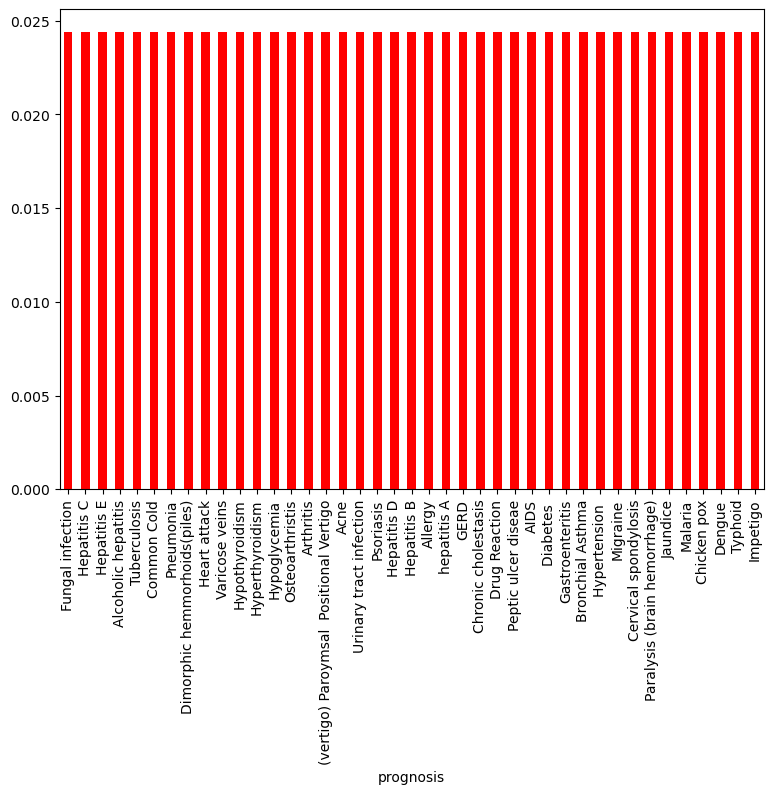

In [227]:
#as we can see each no. diseases having the same percentage through bar chart
input_data['prognosis'].value_counts(normalize = True).plot.bar(color='red')
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

**Check the relationship between the variables by applying the correlation **

**Check for Alternate Hypothesis**

In [233]:
#took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis
pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain'])

weight_gain,0,1
cold_hands_and_feets,,
0,40,0
1,0,1


**As p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis **

In [236]:
#imported the chi square contingency
from scipy.stats import chi2_contingency
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
chi2_contingency(pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain']))

Chi2ContingencyResult(statistic=9.743906249999998, pvalue=0.001799181531053096, dof=1, expected_freq=array([[3.90243902e+01, 9.75609756e-01],
       [9.75609756e-01, 2.43902439e-02]]))

**Train for Custom Training Data**

In [239]:
x = input_data.drop(['prognosis'],axis =1)
y = input_data['prognosis']

KeyError: "['prognosis'] not found in axis"

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

**Multinomial Naive Bayes**

In [159]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

score = mnb.score(x_test, y_test)
print("Accuracy Score: ",score)

Accuracy Score:  0.0


In [35]:
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(x_train, y_train)
score = gbm_clf.score(x_train, y_train)
print(score)

1.0


**K-Fold Cross-Validation**

In [36]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


In [37]:
scores = cross_val_score(gbm_clf, x_test, y_test, cv=10)
print (scores)
print (scores.mean())

[1.         0.98863636 0.99415205 0.99401198 1.         0.98148148
 0.98734177 0.98039216 0.97959184 1.        ]
0.9905607633698713


In [38]:
real_diseases = y_test.values
y_pred = gbm_clf.predict(x_test)
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, 20):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis


In [39]:
#imported Kfold
from sklearn.model_selection import KFold

## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = input_data
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [41]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb, 'G_B' : gbm}
algo_train_scores={}
algo_test_scores={}

**Gradient Boosted Tree is the most efficient algorithm with K=2**

In [42]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(input_data,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


kvalue:  2


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

kvalue:  4


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

kvalue:  6


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

kvalue:  8


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
G_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8707317073170732, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 0.9780487804878049, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


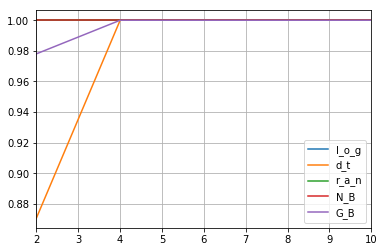

In [43]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

df_test.plot(grid = 1)
plt.show()

In [44]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = input_data
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = gbm.fit(x_train,y_train)
        sum_train += gbm.score(x_train,y_train)
        y_pred = gbm.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)

kvalue:  2


In [45]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.9792682926829268}


**Important Features**

In [46]:
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

In [47]:
features = input_data.columns[:-1]
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 36 - pain_behind_the_eyes (0.026140)
2. feature 118 - blood_in_sputum (0.024720)
3. feature 108 - rusty_sputum (0.024389)
4. feature 109 - lack_of_concentration (0.021867)
5. feature 86 - unsteadiness (0.021715)


In [48]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

**Test the model**

**Take two symptom 'redness_of_eyes' and 'cough'**

In [49]:
feature_dict['redness_of_eyes'], feature_dict['cough']

(52, 24)

In [50]:
sample_x = [i/52 if i ==52 else i/24 if i==24 else i*0 for i in range(len(features))]
len(sample_x)

132

In [51]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))
gbm.predict(sample_x)

array(['Common Cold'], dtype=object)

**So we got the result that it is a symptom of Common Cold**

In [52]:
gbm.predict_proba(sample_x)

array([[0.02670871, 0.02679504, 0.02679504, 0.02484979, 0.02705907,
        0.02497132, 0.0251672 , 0.02655008, 0.02570539, 0.00593524,
        0.10126251, 0.02365065, 0.02531632, 0.02540129, 0.0265485 ,
        0.02703917, 0.02480153, 0.02703349, 0.01584282, 0.02423947,
        0.00490386, 0.00333681, 0.01091795, 0.02088111, 0.02579495,
        0.02594723, 0.02527245, 0.02547248, 0.01863774, 0.00870365,
        0.02497128, 0.02472935, 0.02652078, 0.02614701, 0.02555657,
        0.02426462, 0.02442446, 0.02597144, 0.02570673, 0.0254013 ,
        0.0147656 ]])

In [53]:
gbm.__getstate__()

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'init': None,
 'random_state': None,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'presort': 'auto',
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_': 132,
 'classes_': array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
        'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        

In [54]:
symptoms = x.columns

In [55]:
regex = re.compile('_')

In [56]:
symptoms = [i if regex.search(i) == None else i.replace('_', ' ') for i in symptoms ]

**Symptoms Similarirty Matching [Future Scope]**

In [57]:
# Function to find all close matches of  
# input string in given list of possible strings 
from difflib import get_close_matches  
def closeMatches(patterns, word): 
    print(get_close_matches(word, patterns, n=2, cutoff=0.7))

In [58]:
word = 'sivering'
closeMatches(symptoms, word)

['shivering']


**-------------------------------**

In [59]:
from flashtext import KeywordProcessor
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_list(symptoms)

In [60]:
text = 'I have itching, joint pain and fatigue'
keyword_processor.extract_keywords(text)

['itching', 'joint pain', 'fatigue']

In [61]:
def predict_disease(query):
    matched_keyword = keyword_processor.extract_keywords(query)
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
                

In [62]:
query = 'I have redness of eyes and cough'

In [63]:
predict_disease(query)

['redness_of_eyes', 'cough']
Predicted Disease:  Common Cold


In [64]:
symptoms[:20]

['itching',
 'skin rash',
 'nodal skin eruptions',
 'continuous sneezing',
 'shivering',
 'chills',
 'joint pain',
 'stomach pain',
 'acidity',
 'ulcers on tongue',
 'muscle wasting',
 'vomiting',
 'burning micturition',
 'spotting  urination',
 'fatigue',
 'weight gain',
 'anxiety',
 'cold hands and feets',
 'mood swings',
 'weight loss']